In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold, cross_val_score,GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_context("notebook")

In [2]:
data = pd.read_csv('sonar.all-data.csv',header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
1,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
2,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
3,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
4,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010
5,208.0,0.104570,0.059105,0.0102,0.067025,0.09215,0.134125,0.3823
6,208.0,0.121747,0.061788,0.0033,0.080900,0.10695,0.154000,0.3729
7,208.0,0.134799,0.085152,0.0055,0.080425,0.11210,0.169600,0.4590
8,208.0,0.178003,0.118387,0.0075,0.097025,0.15225,0.233425,0.6828
9,208.0,0.208259,0.134416,0.0113,0.111275,0.18240,0.268700,0.7106


In [6]:
data.iloc[:,-1].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [122]:
data.iloc[:,-1].replace({'M':1,'R':0},inplace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


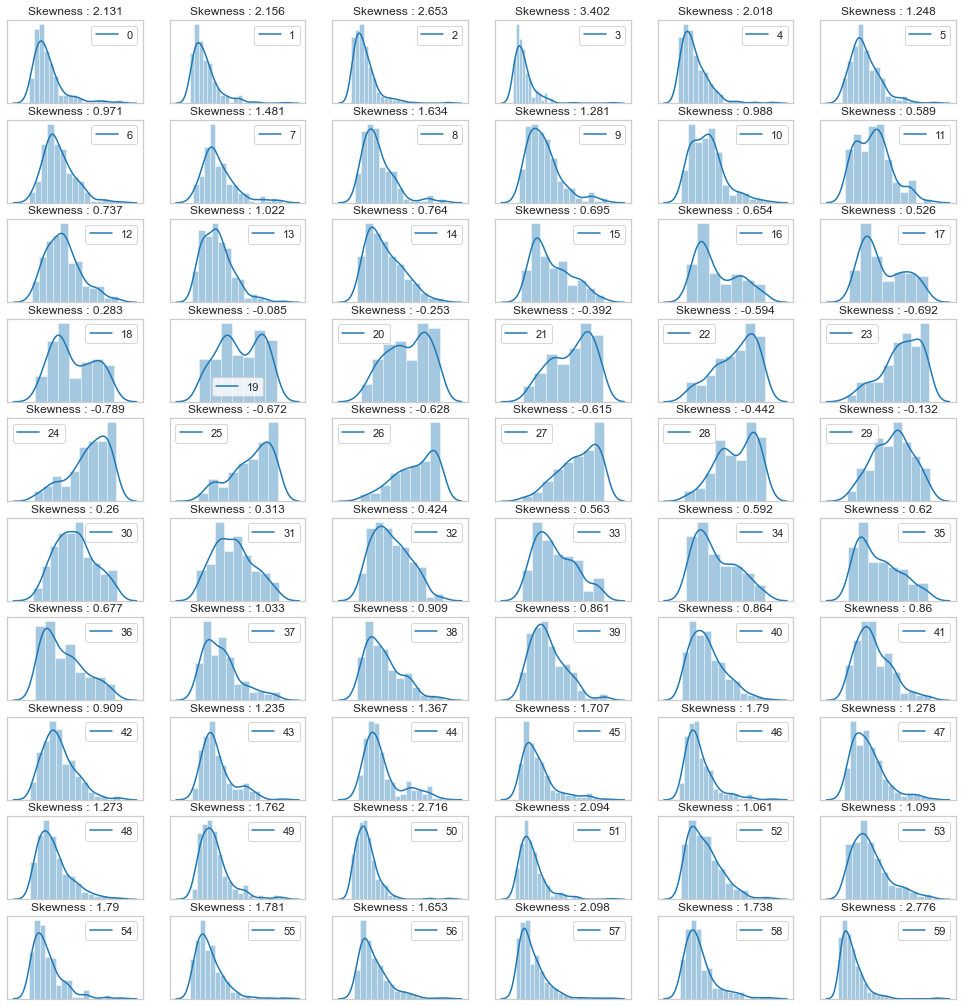

In [123]:
sk = data.skew()
plt.figure(figsize=(17,18))
for i in range(60):
    ax = plt.subplot(10,6,i+1)
    sns.distplot(data[i],kde_kws={"label": str(i)})
    ax.set_title('Skewness : {}'.format(round(sk[i],3)))
    ax.set_ylabel('')    
    ax.set_xlabel('')
    ax.set_yticks([])    
    ax.set_xticks([])
    ax.legend()
plt.show()

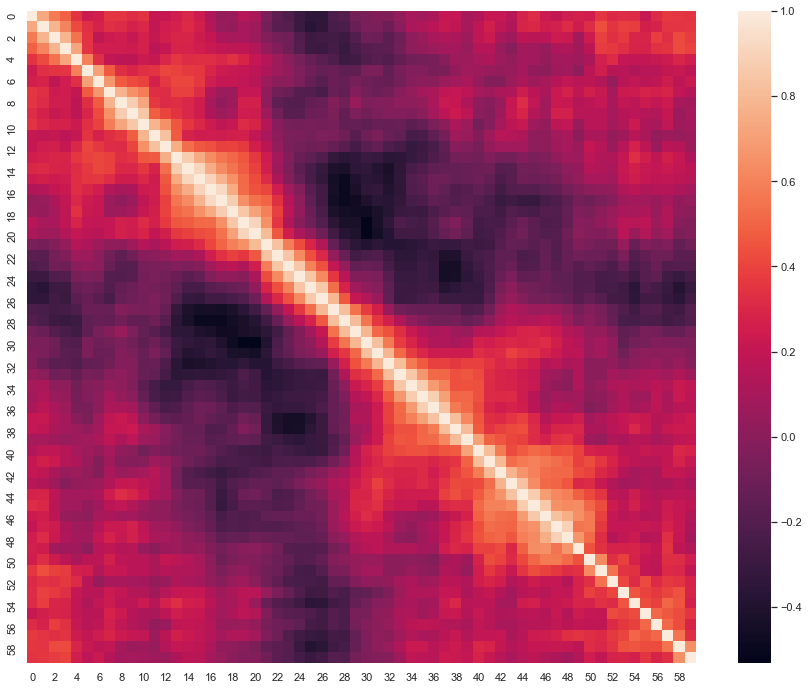

In [124]:
plt.figure(figsize=(15,12))
sns.heatmap(data.iloc[:,:-1].corr(),annot=False,)
plt.show()

In [127]:
x = data.iloc[:,0:-1].values.astype(float)
y = data.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=7)

In [128]:
print(x_train.shape)
print(x_test.shape)
print(y_train.value_counts())
print(y_test.value_counts())

(166, 60)
(42, 60)
1    84
0    82
Name: 60, dtype: int64
1    27
0    15
Name: 60, dtype: int64


In [129]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM', SVC()))

LR:	0.769 (0.101)
LDA:	0.746 (0.118)
KNN:	0.808 (0.068)
CART:	0.747 (0.113)
NB:	0.649 (0.142)
SVM:	0.776 (0.090)


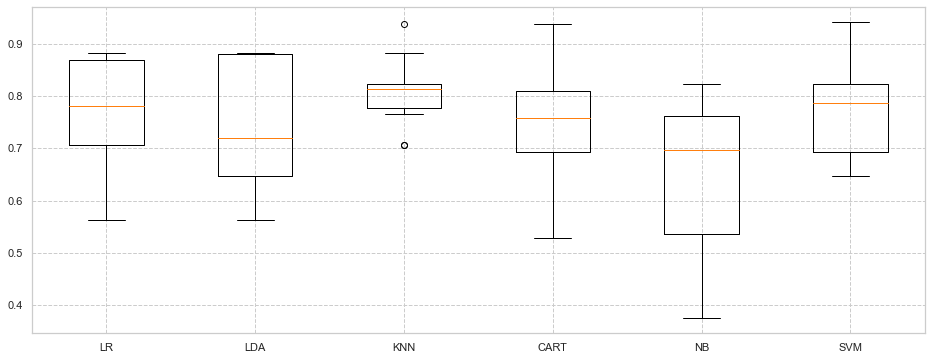

In [130]:
results = []
names = []
scoring = 'accuracy' 
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring,)
    results.append(cv_results)
    names.append(name)
    print('%s:\t%0.3f (%0.3f)' % (name, cv_results.mean(), cv_results.std()))

plt.figure(figsize=(16,6))
plt.boxplot(results,)
plt.xticks(ticks=np.arange(1,7),labels=names)
plt.show()

In [131]:
pipelines=[]
pipelines.append(('Scaled-LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('Scaled-LDA', Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('Scaled-KNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('Scaled-CART', Pipeline([('Scaler', StandardScaler()), ('CART',  DecisionTreeClassifier())])))
pipelines.append(('Scaled-NB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('Scaled-SVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))

Scaled-LR:	0.740 (0.095)
Scaled-LDA:	0.746 (0.118)
Scaled-KNN:	0.826 (0.055)
Scaled-CART:	0.758 (0.135)
Scaled-NB:	0.649 (0.142)
Scaled-SVM:	0.836 (0.089)


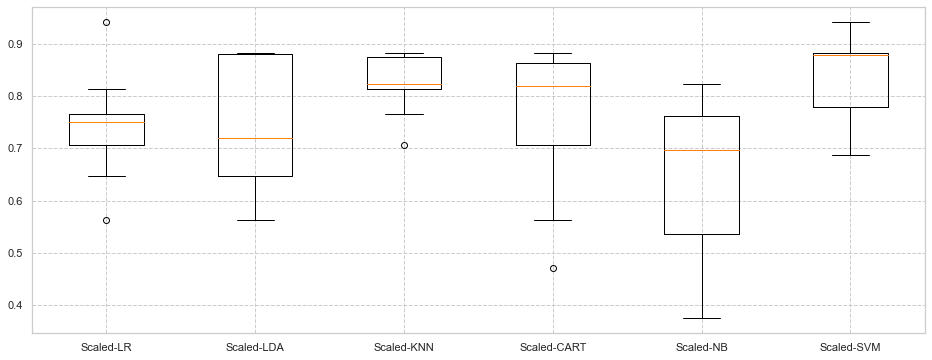

In [132]:
results = []
names = []
scoring = 'accuracy' 
for name, model in pipelines:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring,)
    results.append(cv_results)
    names.append(name)
    print('%s:\t%0.3f (%0.3f)' % (name, cv_results.mean(), cv_results.std()))

plt.figure(figsize=(16,6))
plt.boxplot(results,)
plt.xticks(ticks=np.arange(1,7),labels=names)
plt.show()

In [133]:
scaler = StandardScaler().fit(x_train)
rescaledx = scaler.transform(x_train)
neighbors = [1,3,5,7,9,11]
param_grid  = dict(n_neighbors=neighbors)

model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=7)
grid = GridSearchCV(model, param_grid=param_grid, scoring=scoring, cv=kfold)

grid_result = grid.fit(rescaledx, y_train)

print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
mean = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['mean_test_score']
params  = grid_result.cv_results_['params']
for mean, stds, params in zip(mean, stds, params):
    print('%f (%f) with: %r' % (mean, stds, params))

Best: 0.850000 using {'n_neighbors': 1}
0.850000 (0.850000) with: {'n_neighbors': 1}
0.837132 (0.837132) with: {'n_neighbors': 3}
0.837500 (0.837500) with: {'n_neighbors': 5}
0.763971 (0.763971) with: {'n_neighbors': 7}
0.751471 (0.751471) with: {'n_neighbors': 9}
0.733456 (0.733456) with: {'n_neighbors': 11}


In [134]:
scaler = StandardScaler().fit(x_train)
rescaledx = scaler.transform(x_train)

c_values = [0.1,0.3,0.5,0.7,0.9,1.0,1.3,1.5,1.7,2.0]
kernel_values = ['linear', 'poly','rbf','sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=7)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)

grid_result  = grid.fit(rescaledx, y_train)


print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
mean = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(mean, stds, params):
    print('%f (%f) with: %r' % (mean, std, param))

Best: 0.872426 using {'C': 2.0, 'kernel': 'rbf'}
0.758456 (0.099483) with: {'C': 0.1, 'kernel': 'linear'}
0.535294 (0.114222) with: {'C': 0.1, 'kernel': 'poly'}
0.573162 (0.130930) with: {'C': 0.1, 'kernel': 'rbf'}
0.704044 (0.066933) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.746324 (0.109507) with: {'C': 0.3, 'kernel': 'linear'}
0.642647 (0.132187) with: {'C': 0.3, 'kernel': 'poly'}
0.765809 (0.091692) with: {'C': 0.3, 'kernel': 'rbf'}
0.734926 (0.054567) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.740074 (0.082636) with: {'C': 0.5, 'kernel': 'linear'}
0.662132 (0.105668) with: {'C': 0.5, 'kernel': 'poly'}
0.788235 (0.064190) with: {'C': 0.5, 'kernel': 'rbf'}
0.752941 (0.061996) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.746691 (0.084198) with: {'C': 0.7, 'kernel': 'linear'}
0.746324 (0.129754) with: {'C': 0.7, 'kernel': 'poly'}
0.812500 (0.085513) with: {'C': 0.7, 'kernel': 'rbf'}
0.758824 (0.047088) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.758824 (0.096520) with: {'C': 0.9, 'kernel': 'linear'

ScaledAB:	0.820 (0.058)
ScaledGBM:	0.842 (0.119)
ScaledRF:	0.825 (0.090)
ScaledET:	0.854 (0.102)


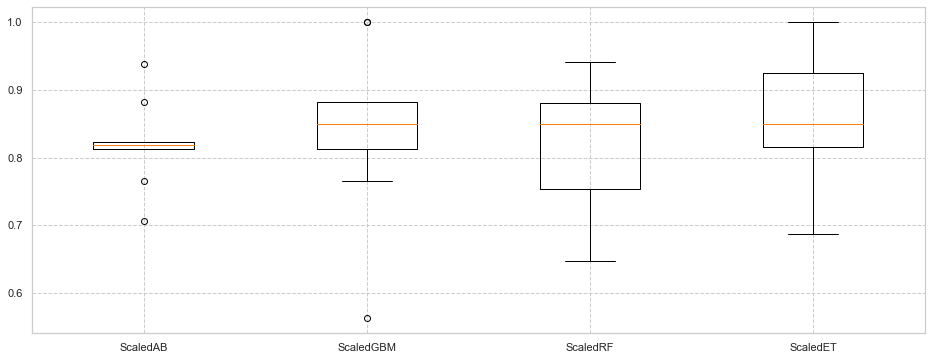

In [135]:
ensemble = []
ensemble.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostClassifier())])))
ensemble.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingClassifier())])))
ensemble.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestClassifier())])))
ensemble.append(('ScaledET', Pipeline([('Scaler', StandardScaler()), ('ET', ExtraTreesClassifier())])))

results = []
names = []
for name, model in ensemble:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring,)
    results.append(cv_results)
    names.append(name)
    print('%s:\t%0.3f (%0.3f)' % (name, cv_results.mean(), cv_results.std()))

plt.figure(figsize=(16,6))
plt.boxplot(results,)
plt.xticks(ticks=np.arange(1,5),labels=names)
plt.show()

In [137]:
scaler  = StandardScaler().fit(x_train)
rescaledx = scaler.transform(x_train)
model = SVC(C=2.0, kernel='rbf',probability=True)
model.fit(rescaledx, y_train)
rescaled_val_x = scaler.transform(x_test)
preditions = model.predict(rescaled_val_x)
print('Accuracy: ', accuracy_score(y_test, preditions) * 100, '\n')
print('Confusion Matrix : \n',confusion_matrix(y_test, preditions), '\n')
print('Classification Report : \n ',classification_report(y_test, preditions))

Accuracy:  92.85714285714286 

Confusion Matrix : 
 [[14  1]
 [ 2 25]] 

Classification Report : 
                precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.96      0.93      0.94        27

    accuracy                           0.93        42
   macro avg       0.92      0.93      0.92        42
weighted avg       0.93      0.93      0.93        42



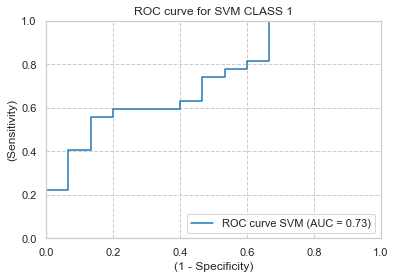

In [138]:
svm_pred_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, svm_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve SVM (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for SVM CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [139]:
scaler  = StandardScaler().fit(x_train)
rescaledx = scaler.transform(x_train)
model = ExtraTreesClassifier()
model.fit(rescaledx, y_train)
rescaled_val_x = scaler.transform(x_test)
preditions = model.predict(rescaled_val_x)
print('Accuracy: ', accuracy_score(y_test, preditions) * 100, '\n')
print('Confusion Matrix : \n',confusion_matrix(y_test, preditions), '\n')
print('Classification Report : \n ',classification_report(y_test, preditions))

Accuracy:  88.09523809523809 

Confusion Matrix : 
 [[13  2]
 [ 3 24]] 

Classification Report : 
                precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.92      0.89      0.91        27

    accuracy                           0.88        42
   macro avg       0.87      0.88      0.87        42
weighted avg       0.88      0.88      0.88        42



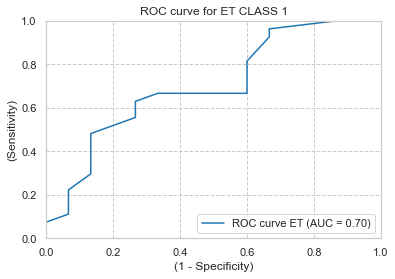

In [140]:
svm_pred_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, svm_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve ET (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for ET CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()